### Movies of simulations with best coeff

In [5]:
import xarray as xr
import xrft
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2
    
from sim_analysis_modules import create_leaf, analyze_sims

In [10]:
import sys
sys.path.append('/home/db194/mom6_notebooks/helpers/')
from plot_helpers import *

In [6]:
scales = ['10','20','30','40','80']
#C = ['0.1','0.25','0.5','1']
Cvals = ['0','0.1','0.25','0.3','0.4','0.5','0.6','0.7','0.75','1']

scales_array = np.array(scales, dtype=float)
Cvals_array = np.array(Cvals, dtype=float)

In [11]:
ds_HR = analyze_sims('/scratch/db194/mom6/tests_Phillips_2layer/generate_training_data/Phillips_2layer_4km_10day/')

In [8]:
ds_ANN_dic = {}

dir = '/scratch/db194/mom6/tests_Phillips_2layer/tests_actual_ANN/tests_local_para_perp_arch_11mar_2024/Phillips_2layer_'
for L in scales:
    print(L)
    for c in Cvals:
        if c == '0': 
            dir_case= '/scratch/db194/mom6/tests_Phillips_2layer/Phillips_2layer_'+L+'km/'
        elif c == '1': 
            dir_case = dir + L+'km_ANN_FGR5/'
        elif c == '0.25' or c == '0.75':
            intp = str(int(float(c)*100))
            dir_case = dir + L+'km_ANN_FGR5_Cperp_p'+intp+'_Cpara_p'+intp+'/'
        else: 
            intp = str(int(float(c)*10))
            dir_case = dir + L+'km_ANN_FGR5_Cperp_p'+intp+'_Cpara_p'+intp+'/'
            
        #print(c)
        #print(dir_case)
        
        create_leaf(ds_ANN_dic, [L, c], analyze_sims(dir_case))
            
   
   

10
20
30
40
80


In [14]:
ds_ANN_dic['20']['0.25'].prog

<xarray.Dataset>
Dimensions:           (xq: 61, yh: 80, zl: 2, Time: 108, xh: 60, yq: 81, zi: 3)
Coordinates:
  * xq                (xq) float64 0.0 20.0 40.0 ... 1.16e+03 1.18e+03 1.2e+03
  * yh                (yh) float64 10.0 30.0 50.0 ... 1.55e+03 1.57e+03 1.59e+03
  * zl                (zl) float64 1.031e+03 1.033e+03
  * Time              (Time) float64 10.0 20.0 30.0 ... 1.07e+03 1.08e+03
  * xh                (xh) float64 10.0 30.0 50.0 ... 1.15e+03 1.17e+03 1.19e+03
  * yq                (yq) float64 0.0 20.0 40.0 ... 1.56e+03 1.58e+03 1.6e+03
  * zi                (zi) float64 1.03e+03 1.032e+03 1.034e+03
Data variables: (12/18)
    u                 (Time, zl, yh, xq) float32 ...
    v                 (Time, zl, yq, xh) float32 ...
    h                 (Time, zl, yh, xh) float64 ...
    e                 (Time, zi, yh, xh) float32 ...
    Ahh               (Time, zl, yh, xh) float32 ...
    Ahq               (Time, zl, yq, xq) float32 ...
    ...                ...
    dudx_c            (Time, zi, yh, xh) float64 ...
    dudy_c            (Time, zi, yh, xh) float64 ...
    dvdx_c            (Time, zi, yh, xh) float64 ...
    dvdy_c            (Time, zi, yh, xh) float64 ...
    RV                (Time, zl, yq, xq) float32 ...
    PV                (Time, zl, yq, xq) float32 ...
Attributes:
    filename:   prog.nc
    title:      Phillips experiment
    grid_type:  regular
    grid_tile:  N/A

In [4]:
c_choice = ['0.5', '0.5', '0.5', '0.5','0.25']

In [57]:
def plot(idT):
    plt.figure(figsize=(16, 14))

    #idT = 100

    vmin = -3e-5

    plt.subplot(4,5,1)
    ds_HR.prog.RV.isel(Time=idT, zl=0).plot(vmin=vmin, add_colorbar=False)
    plt.title('4 km')
    plt.xlabel('X [km]')
    plt.ylabel('Y [km]')

    n=0
    for L in scales:
        plt.subplot(4,5,6+n)
        if L=='80':
            ds_ANN_dic[L]['0'].prog.RV.isel(Time=idT, zl=0).plot(vmin=vmin/5,add_colorbar=False)
        else:
            ds_ANN_dic[L]['0'].prog.RV.isel(Time=idT, zl=0).plot(vmin=vmin,add_colorbar=False)
        plt.title(L+' km, no param')
        plt.xlabel('X [km]')
        plt.ylabel('Y [km]')
        n=n+1

    n=0 
    for L in scales:
        plt.subplot(4,5,11+n)
        if L=='80':
            ds_ANN_dic[L]['0.25'].prog.RV.isel(Time=idT, zl=0).plot(vmin=vmin/5,add_colorbar=False)
        else:
            ds_ANN_dic[L]['0.25'].prog.RV.isel(Time=idT, zl=0).plot(vmin=vmin,add_colorbar=False)
        plt.title(L+' km, ANN C=0.25')
        plt.xlabel('X [km]')
        plt.ylabel('Y [km]')
        n=n+1

    n=0 
    for L in scales:
        plt.subplot(4,5,16+n)
        if L=='80':
            ds_ANN_dic[L]['0.75'].prog.RV.isel(Time=idT, zl=0).plot(vmin=vmin/5,add_colorbar=False)
        else:
            ds_ANN_dic[L]['0.75'].prog.RV.isel(Time=idT, zl=0).plot(vmin=vmin,add_colorbar=False)
        plt.title(L+' km, ANN C=0.5')
        plt.xlabel('X [km]')
        plt.ylabel('Y [km]')
        n=n+1
        
    plt.tight_layout()
    plt.suptitle('Time:'+str(int(ds_HR.prog.Time.isel(Time=idT).values)) +' days')

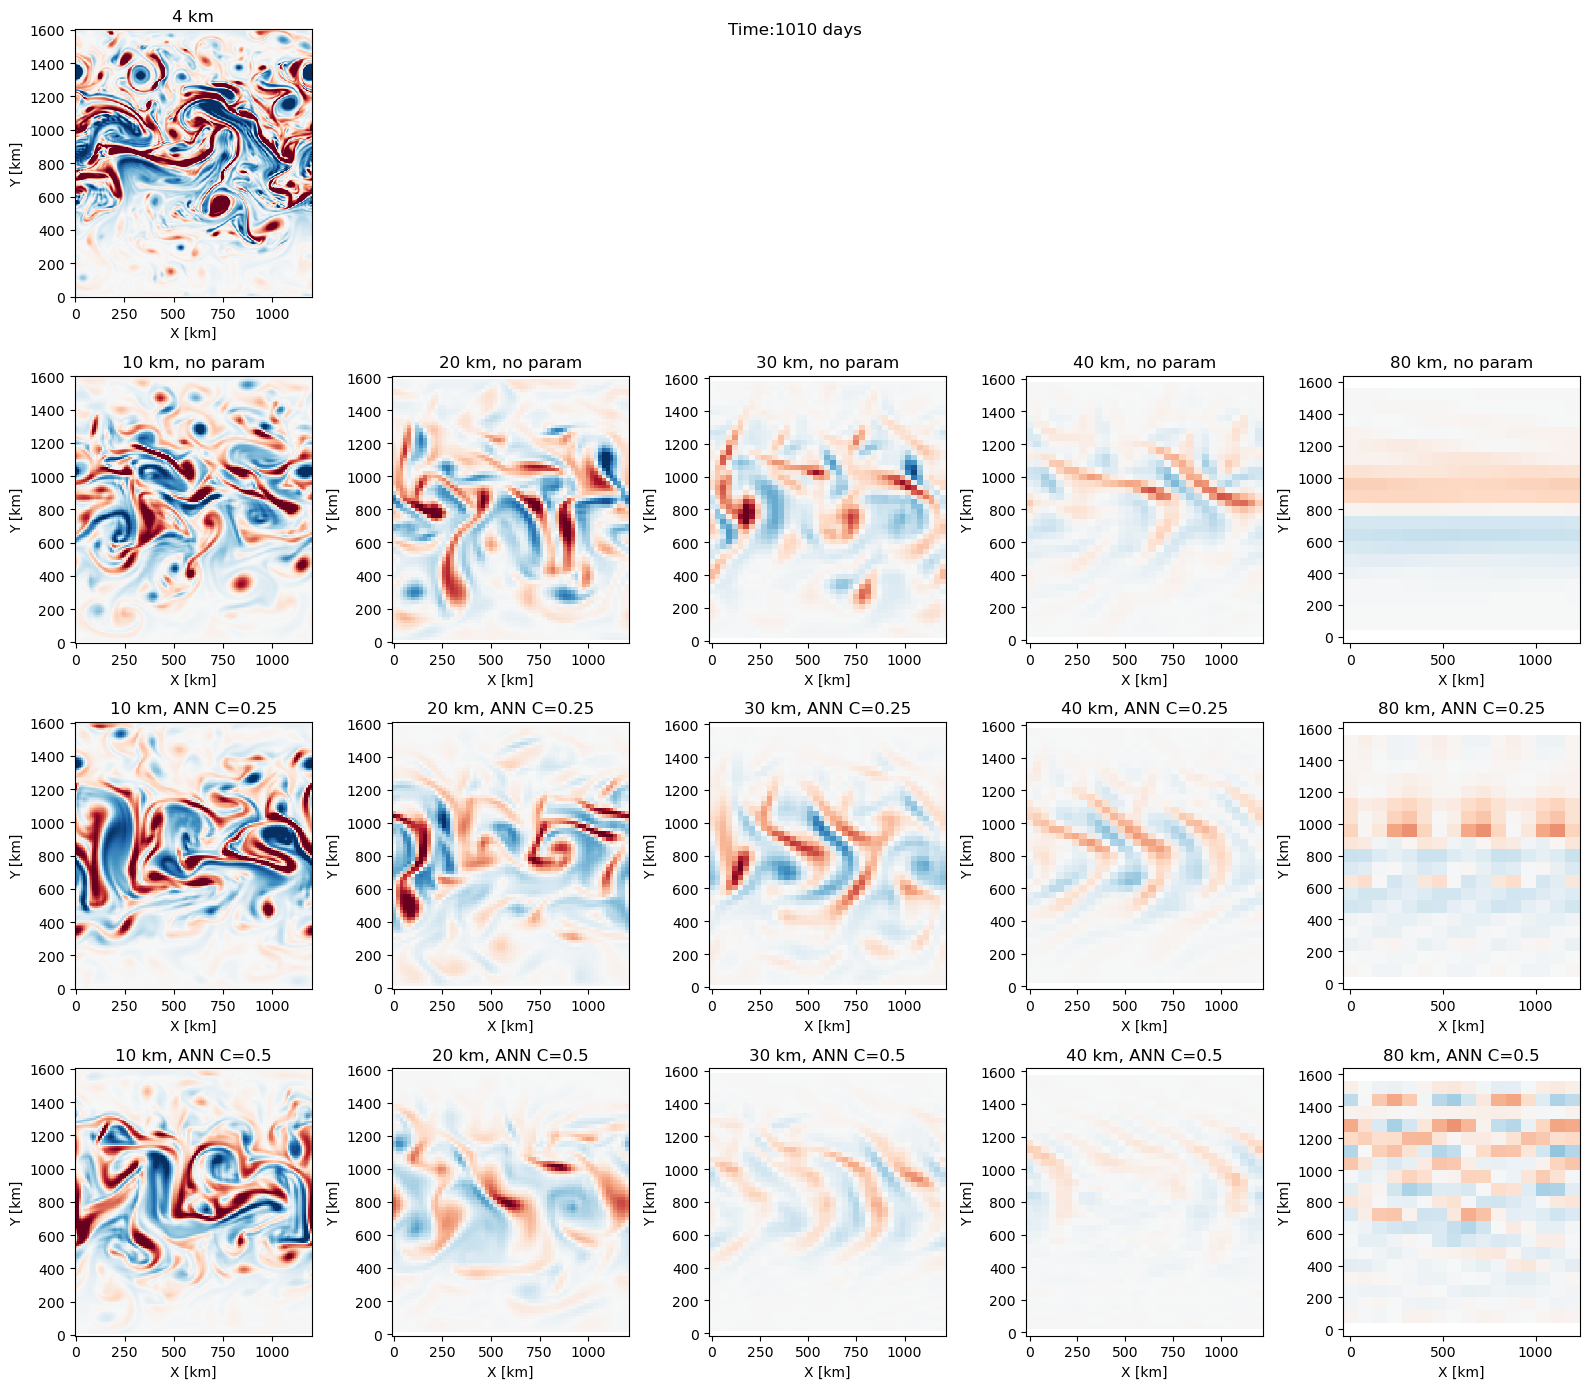

In [58]:
plot(100)

In [59]:
anim_flag = 1
if anim_flag == 1:
    create_animation(plot, range(0,108), 'Phillips.gif', dpi=100, FPS=6)

Animation at FPS=6 will last for 18.0 seconds
